In [9]:
import pandas as pd
import numpy as np
import mibian
import time
import datetime

In [3]:
options1_df = pd.read_csv('yahooData/results/finalData_3-11.csv', delimiter=',', engine='python')
options2_df = pd.read_csv('yahooData/results/finalData_3-18.csv', delimiter=',', engine='python')
options3_df = pd.read_csv('yahooData/results/finalData_3-25.csv', delimiter=',', engine='python')
options4_df = pd.read_csv('yahooData/results/finalData_4-01.csv', delimiter=',', engine='python')
options5_df = pd.read_csv('yahooData/results/finalData_4-08.csv', delimiter=',', engine='python')
options6_df = pd.read_csv('yahooData/results/finalData_4-15.csv', delimiter=',', engine='python')
options7_df = pd.read_csv('yahooData/results/finalData_4-22.csv', delimiter=',', engine='python')

frames = [options1_df, options2_df, options3_df, options4_df, options5_df, options6_df]
# frames = [options4_df, options5_df, options6_df]

options_df = pd.concat(frames)

In [4]:
def categorise(row):
    return ((row['Final Price'] - row['Current Price']) / row['Current Price']) * 100

options_df['Percent Price Change'] = options_df.apply(lambda row: categorise(row), axis=1)
options7_df['Percent Price Change'] = options7_df.apply(lambda row: categorise(row), axis=1)

In [5]:
calls_df = options_df.loc[options_df['Call'] == True]
puts_df = options_df.loc[options_df['Call'] == False]

options7call_df = options7_df.loc[options7_df['Call'] == True]
options7put_df = options7_df.loc[options7_df['Call'] == False]

In [6]:
print("Before:", calls_df.shape, puts_df.shape, options7call_df.shape, options7put_df.shape)
calls_df = calls_df[calls_df['Sector'] == 'Technology']
puts_df = puts_df[puts_df['Sector'] == 'Technology']

options7call_df = options7call_df[options7call_df['Sector'] == 'Technology']
options7put_df = options7put_df[options7put_df['Sector'] == 'Technology']
print("After:", calls_df.shape, puts_df.shape, options7call_df.shape, options7put_df.shape)

Before: (199867, 19) (186636, 19) (15853, 19) (15296, 19)
After: (47426, 19) (44529, 19) (3241, 19) (3129, 19)


In [7]:
def callDelta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.callDelta

def callTheta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.callTheta

def callRho(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.callRho

def callVega(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.vega

def callGamma(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.gamma

def putDelta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.putDelta

def putTheta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.putTheta

def putRho(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.putRho

def putVega(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.vega

def putGamma(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.gamma

In [10]:
start_time = time.time()

calls_df['Delta'] = calls_df.apply(lambda row: callDelta(row), axis=1)
calls_df['Theta'] = calls_df.apply(lambda row: callTheta(row), axis=1)
calls_df['Rho'] = calls_df.apply(lambda row: callRho(row), axis=1)
calls_df['Vega'] = calls_df.apply(lambda row: callVega(row), axis=1)
calls_df['Gamma'] = calls_df.apply(lambda row: callGamma(row), axis=1)

options7call_df['Delta'] = options7call_df.apply(lambda row: callDelta(row), axis=1)
options7call_df['Theta'] = options7call_df.apply(lambda row: callTheta(row), axis=1)
options7call_df['Rho'] = options7call_df.apply(lambda row: callRho(row), axis=1)
options7call_df['Vega'] = options7call_df.apply(lambda row: callVega(row), axis=1)
options7call_df['Gamma'] = options7call_df.apply(lambda row: callGamma(row), axis=1)

puts_df['Delta'] = puts_df.apply(lambda row: putDelta(row), axis=1)
puts_df['Theta'] = puts_df.apply(lambda row: putTheta(row), axis=1)
puts_df['Rho'] = puts_df.apply(lambda row: putRho(row), axis=1)
puts_df['Vega'] = puts_df.apply(lambda row: putVega(row), axis=1)
puts_df['Gamma'] = puts_df.apply(lambda row: putGamma(row), axis=1)

options7put_df['Delta'] = options7put_df.apply(lambda row: putDelta(row), axis=1)
options7put_df['Theta'] = options7put_df.apply(lambda row: putTheta(row), axis=1)
options7put_df['Rho'] = options7put_df.apply(lambda row: putRho(row), axis=1)
options7put_df['Vega'] = options7put_df.apply(lambda row: putVega(row), axis=1)
options7put_df['Gamma'] = options7put_df.apply(lambda row: putGamma(row), axis=1)

print(f"Took {datetime.timedelta(seconds=(time.time() - start_time))} seconds")

Took 0:14:03.237727 seconds


In [11]:
options7call_df

,Symbol,Strike,Current Price,Implied Volatility,Volume,In the Money,Expiration Date,Call,Mark,Sector,...,Final Price,Needed Percent Change,Success,Profit,Percent Price Change,Delta,Theta,Rho,Vega,Gamma
0,AAPL,120.0,164.9605,1.599611,20.0,True,2022-04-22,True,45.450,Technology,...,161.79,0.297,0,-3.660,-1.921975,0.976373,-0.192455,1.269513e-02,0.009625,2.017731e-03
1,AAPL,135.0,164.9605,1.117192,40.0,True,2022-04-22,True,30.500,Technology,...,161.79,0.327,0,-3.710,-1.921975,0.961824,-0.200068,1.407060e-02,0.014327,4.300167e-03
2,AAPL,145.0,164.9605,0.799318,52.0,True,2022-04-22,True,20.525,Technology,...,161.79,0.342,0,-3.735,-1.921975,0.943307,-0.196584,1.482775e-02,0.019675,8.254112e-03
3,AAPL,149.0,164.9605,0.675784,158.0,True,2022-04-22,True,16.550,Technology,...,161.79,0.357,0,-3.760,-1.921975,0.929731,-0.196443,1.501753e-02,0.023255,1.153942e-02
4,AAPL,150.0,164.9605,0.642582,271.0,True,2022-04-22,True,15.550,Technology,...,161.79,0.357,0,-3.760,-1.921975,0.926043,-0.194262,1.506009e-02,0.024185,1.262099e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30767,LRCX,570.0,465.4300,1.343753,21.0,False,2022-04-22,True,0.020,Technology,...,463.13,22.472,0,-106.890,-0.494167,0.000026,-0.002530,1.613012e-07,0.000019,4.722589e-06
30768,LRCX,580.0,465.4300,1.406253,33.0,False,2022-04-22,True,0.015,Technology,...,463.13,24.619,0,-116.885,-0.494167,0.000013,-0.001415,8.334925e-08,0.000010,2.411425e-06
30769,LRCX,600.0,465.4300,1.468753,21.0,False,2022-04-22,True,0.005,Technology,...,463.13,28.914,0,-136.875,-0.494167,0.000002,-0.000209,1.074087e-08,0.000001,3.259872e-07
30770,LRCX,605.0,465.4300,1.593752,20.0,False,2022-04-22,True,0.010,Technology,...,463.13,29.989,0,-141.880,-0.494167,0.000005,-0.000636,3.156864e-08,0.000004,8.441916e-07


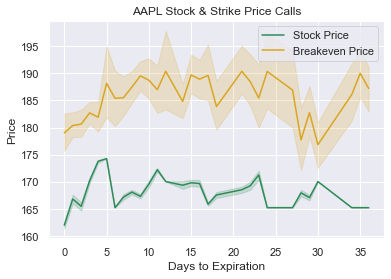

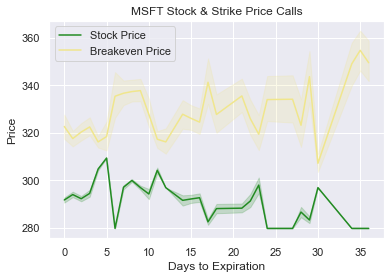

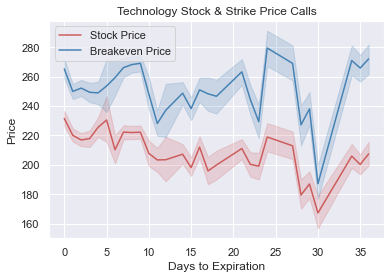

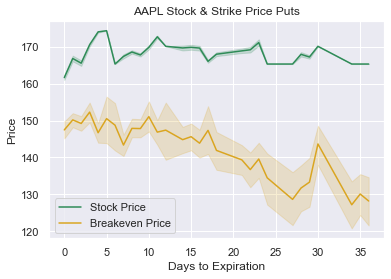

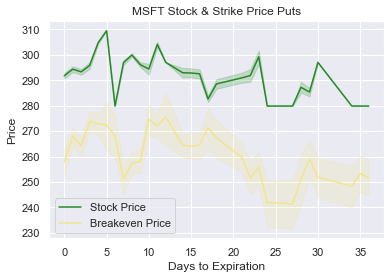

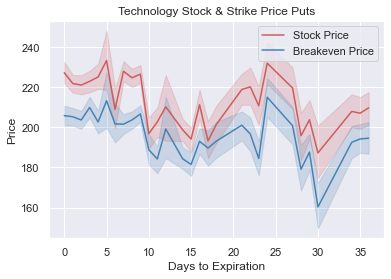

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.color_palette("Spectral")

sns.lineplot(x="Days to Expire", y="Final Price", data=calls_df[calls_df['Symbol'] == 'AAPL'], color="seagreen")
p1 = sns.lineplot(x="Days to Expire", y="Breakeven Price", data=calls_df[calls_df['Symbol'] == 'AAPL'], color="goldenrod")
p1.set(title="AAPL Stock & Strike Price Calls",xlabel="Days to Expiration",ylabel="Price")
plt.legend(labels=["Stock Price","Breakeven Price"])
plt.show()

sns.lineplot(x="Days to Expire", y="Final Price", data=calls_df[calls_df['Symbol'] == 'MSFT'], color="forestgreen")
p2 = sns.lineplot(x="Days to Expire", y="Breakeven Price", data=calls_df[calls_df['Symbol'] == 'MSFT'], color="khaki")
p2.set(title="MSFT Stock & Strike Price Calls",xlabel="Days to Expiration",ylabel="Price")
plt.legend(labels=["Stock Price","Breakeven Price"])
plt.show()

sns.lineplot(x="Days to Expire", y="Final Price", data=calls_df[calls_df['Sector'] == 'Technology'], color="indianred")
p3 = sns.lineplot(x="Days to Expire", y="Breakeven Price", data=calls_df[calls_df['Sector'] == 'Technology'], color="steelblue")
p3.set(title="Technology Stock & Strike Price Calls",xlabel="Days to Expiration",ylabel="Price")
plt.legend(labels=["Stock Price","Breakeven Price"])
plt.show()

sns.lineplot(x="Days to Expire", y="Final Price", data=puts_df[puts_df['Symbol'] == 'AAPL'], color="seagreen")
p4 = sns.lineplot(x="Days to Expire", y="Breakeven Price", data=puts_df[puts_df['Symbol'] == 'AAPL'], color="goldenrod")
p4.set(title="AAPL Stock & Strike Price Puts",xlabel="Days to Expiration",ylabel="Price")
plt.legend(labels=["Stock Price","Breakeven Price"])
plt.show()

sns.lineplot(x="Days to Expire", y="Final Price", data=puts_df[puts_df['Symbol'] == 'MSFT'], color="forestgreen")
p5 = sns.lineplot(x="Days to Expire", y="Breakeven Price", data=puts_df[puts_df['Symbol'] == 'MSFT'], color="khaki")
p5.set(title="MSFT Stock & Strike Price Puts",xlabel="Days to Expiration",ylabel="Price")
plt.legend(labels=["Stock Price","Breakeven Price"])
plt.show()

sns.lineplot(x="Days to Expire", y="Final Price", data=puts_df[puts_df['Sector'] == 'Technology'], color="indianred")
p5 = sns.lineplot(x="Days to Expire", y="Breakeven Price", data=puts_df[puts_df['Sector'] == 'Technology'], color="steelblue")
p5.set(title="Technology Stock & Strike Price Puts",xlabel="Days to Expiration",ylabel="Price")
plt.legend(labels=["Stock Price","Breakeven Price"])
plt.show()

In [ ]:
p6 = sns.lineplot(x="Days to Expire", y="Implied Volatility", data=calls_df[calls_df['Symbol'] == 'AAPL'], color="seagreen")
p6.set(title="AAPL Calls Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p7 = sns.lineplot(x="Days to Expire", y="Implied Volatility", data=calls_df[calls_df['Symbol'] == 'MSFT'], color="seagreen")
p7.set(title="MSFT Calls Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p8 = sns.lineplot(x="Days to Expire", y="Implied Volatility", data=calls_df[calls_df['Sector'] == 'Technology'], color="seagreen")
p8.set(title="Technology Calls Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p9 = sns.lineplot(x="Days to Expire", y="Implied Volatility", data=puts_df[puts_df['Symbol'] == 'AAPL'], color="seagreen")
p9.set(title="AAPL Puts Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p10 = sns.lineplot(x="Days to Expire", y="Implied Volatility", data=puts_df[puts_df['Symbol'] == 'MSFT'], color="seagreen")
p10.set(title="MSFT Puts Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p11 = sns.lineplot(x="Days to Expire", y="Implied Volatility", data=puts_df[puts_df['Sector'] == 'Technology'], color="seagreen")
p11.set(title="Technology Puts Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

In [ ]:
p12 = sns.scatterplot(x="Implied Volatility", y="Percent Price Change", data=calls_df[calls_df['Symbol'] == 'AAPL'], color="seagreen")
p12.set(title="AAPL Calls Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p13 = sns.scatterplot(x="Implied Volatility", y="Percent Price Change", data=calls_df[calls_df['Symbol'] == 'MSFT'], color="seagreen")
p13.set(title="MSFT Calls Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p14 = sns.scatterplot(x="Implied Volatility", y="Percent Price Change", data=calls_df[calls_df['Sector'] == 'Technology'], color="seagreen")
p14.set(title="Technology Calls Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p15 = sns.scatterplot(x="Implied Volatility", y="Percent Price Change", data=puts_df[puts_df['Symbol'] == 'AAPL'], color="seagreen")
p15.set(title="AAPL Puts Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p16 = sns.scatterplot(x="Implied Volatility", y="Percent Price Change", data=puts_df[puts_df['Symbol'] == 'MSFT'], color="seagreen")
p16.set(title="MSFT Puts Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

p17 = sns.scatterplot(x="Implied Volatility", y="Percent Price Change", data=puts_df[puts_df['Sector'] == 'Technology'], color="seagreen")
p17.set(title="Technology Puts Days To Expiration vs. Implied Volatility for Week 3/11")
plt.show()

In [12]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
import seaborn as sns

def performLOOCV(trainX, trainY, C, G):
#     dates = ['2022-03-11', '2022-03-18', '2022-03-25', '2022-04-01', '2022-04-08', '2022-04-14']
    dates = ['2022-04-01', '2022-04-08', '2022-04-14']
    accur = []
    for date in dates:
        testerX = trainX.loc[trainX['Expiration Date'] == date]
        testerY = trainY.loc[trainY['Expiration Date'] == date]
        trainerX = trainX.loc[trainX['Expiration Date'] != date]
        trainerY = trainY.loc[trainY['Expiration Date'] != date]
        
        testerX = testerX.drop(['Expiration Date'], axis=1)
        testerY = testerY.drop(['Expiration Date'], axis=1)
        trainerX = trainerX.drop(['Expiration Date'], axis=1)
        trainerY = trainerY.drop(['Expiration Date'], axis=1)
        
        model = SVC(C= C, kernel='rbf', gamma = G)
        model.fit(trainerX, trainerY.to_numpy().flatten())
        predict = model.predict(testerX)
        app = model.score(testerX, testerY)
        accur.append(app)
        cf_matrix = confusion_matrix(testerY, predict)
        print(cf_matrix)
        ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')
        plt.show()
    print(accur)
    print(f"C = {C} \t Gamma = {G} \t Average is: {sum(accur) / len(accur) * 100:1.4}%")


In [ ]:
start_time = time.time()

trainX = calls_df[calls_df['Sector'] == 'Technology']
trainX = trainX.filter(['Implied Volatility', 'Volume', 'Days to Expire', 'Expiration Date', 'Needed Percent Change'], axis=1)
trainY = calls_df[calls_df['Sector'] == 'Technology']
trainY = trainY.filter(['Success', 'Expiration Date'], axis=1)

# performLOOCV(trainX, trainY, 5, 0.2)

print(f"Took {time.time() - start_time} seconds")

In [ ]:
start_time = time.time()

trainX = puts_df[puts_df['Sector'] == 'Technology']
trainX = trainX.filter(['Implied Volatility', 'Volume', 'Days to Expire', 'Expiration Date', 'Needed Percent Change'], axis=1)
trainY = puts_df[puts_df['Sector'] == 'Technology']
trainY = trainY.filter(['Success', 'Expiration Date'], axis=1)

# performLOOCV(trainX, trainY, 5, 0.2)

print(f"Took {time.time() - start_time} seconds")

In [ ]:
trainX = calls_df[calls_df['Sector'] == 'Technology']
trainX = trainX.filter(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change'], axis=1)
trainY = calls_df[calls_df['Sector'] == 'Technology']
trainY = trainY.filter(['Success'], axis=1)

# options7call_df = options7_df.loc[options7_df['Call'] == True]

testX = options7call_df[options7call_df['Sector'] == 'Technology']
testX = testX.filter(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change'], axis=1)
testY = options7call_df[options7call_df['Sector'] == 'Technology']
testY = testY.filter(['Success'], axis=1)

In [ ]:
start_time = time.time()

model = SVC(C= 20, kernel='rbf', gamma = 1)
model.fit(trainX, trainY.to_numpy().flatten())
trainPredict = model.predict(trainX)
cfMatrixTrain = confusion_matrix(trainY, trainPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(trainY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(trainPredict) == 1)}.")
print(cfMatrixTrain)
ax = sns.heatmap(cfMatrixTrain/np.sum(cfMatrixTrain), annot=True, cmap='Oranges')
plt.show()

testPredict = model.predict(testX)
app = model.score(testX, testY)
print(app)
cfMatrixTest = confusion_matrix(testY, testPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(testY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(testPredict) == 1)}.")
print(cfMatrixTest)
ax = sns.heatmap(cfMatrixTest/np.sum(cfMatrixTest), annot=True, cmap='Blues')
plt.show()

print(f"Took {datetime.timedelta(seconds=(time.time() - start_time))} seconds")

In [ ]:
trainX = puts_df[puts_df['Sector'] == 'Technology']
trainX = trainX.filter(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change'], axis=1)
trainY = puts_df[puts_df['Sector'] == 'Technology']
trainY = trainY.filter(['Success'], axis=1)

# options7put_df = options7_df.loc[options7_df['Call'] == False]

testX = options7put_df[options7put_df['Sector'] == 'Technology']
testX = testX.filter(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change'], axis=1)
testY = options7put_df[options7put_df['Sector'] == 'Technology']
testY = testY.filter(['Success'], axis=1)

In [ ]:
start_time = time.time()

model = SVC(C= 5, kernel='rbf', gamma = 0.2)
model.fit(trainX, trainY.to_numpy().flatten())
trainPredict = model.predict(trainX)
cfMatrixTrain = confusion_matrix(trainY, trainPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(trainY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(trainPredict) == 1)}.")
print(cfMatrixTrain)
ax = sns.heatmap(cfMatrixTrain/np.sum(cfMatrixTrain), annot=True, cmap='Oranges')
plt.show()

testPredict = model.predict(testX)
print(np.count_nonzero(np.array(testY) == 1))
app = model.score(testX, testY)
print(app)
cfMatrixTest = confusion_matrix(testY, testPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(testY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(testPredict) == 1)}.")
print(cfMatrixTest)
ax = sns.heatmap(cfMatrixTest/np.sum(cfMatrixTest), annot=True, cmap='Blues')
plt.show()

print(f"Took {datetime.timedelta(seconds=(time.time() - start_time))} seconds")

In [ ]:
from sklearn.svm import SVR
start_time = time.time()

model = SVR(C= 20, kernel='rbf', gamma = 1, epsilon =0.001)
model.fit(trainX, trainY.to_numpy().flatten())
trainPredict = model.predict(trainX)
print(trainY, trainPredict)
cfMatrixTrain = confusion_matrix(trainY, trainPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(trainY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(trainPredict) == 1)}.")
print(cfMatrixTrain)
ax = sns.heatmap(cfMatrixTrain/np.sum(cfMatrixTrain), annot=True, cmap='Oranges')
plt.show()

testPredict = model.predict(testX)
print(np.count_nonzero(np.array(testY) == 1))
app = model.score(testX, testY)
print(app)
cfMatrixTest = confusion_matrix(testY, testPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(testY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(testPredict) == 1)}.")
print(cfMatrixTest)
ax = sns.heatmap(cfMatrixTest/np.sum(cfMatrixTest), annot=True, cmap='Blues')
plt.show()

print(f"Took {datetime.timedelta(seconds=(time.time() - start_time))} seconds")

In [13]:
trainX = calls_df[calls_df['Sector'] == 'Technology']
trainX = trainX.filter(['Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], axis=1)
trainY = calls_df[calls_df['Sector'] == 'Technology']
trainY = trainY.filter(['Success'], axis=1)

# options7call_df = options7_df.loc[options7_df['Call'] == True]

testX = options7call_df[options7call_df['Sector'] == 'Technology']
testX = testX.filter(['Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], axis=1)
testY = options7call_df[options7call_df['Sector'] == 'Technology']
testY = testY.filter(['Success'], axis=1)

Count of 1s in actual: 5192, Count of 1s in model:0.
[[42234     0]
 [ 5192     0]]


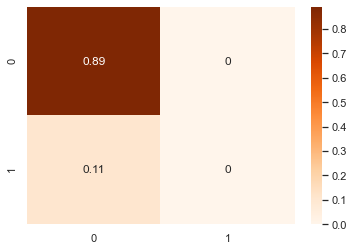

63
0.980561555075594
Count of 1s in actual: 63, Count of 1s in model:0.
[[3178    0]
 [  63    0]]


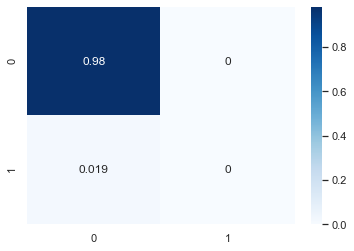

Took 0:00:27.373793 seconds


In [16]:
start_time = time.time()

model = SVC(C= 5, kernel='rbf', gamma = 0.2)
model.fit(trainX, trainY.to_numpy().flatten())
trainPredict = model.predict(trainX)
cfMatrixTrain = confusion_matrix(trainY, trainPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(trainY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(trainPredict) == 1)}.")
print(cfMatrixTrain)
ax = sns.heatmap(cfMatrixTrain/np.sum(cfMatrixTrain), annot=True, cmap='Oranges')
plt.show()

testPredict = model.predict(testX)
print(np.count_nonzero(np.array(testY) == 1))
app = model.score(testX, testY)
print(app)
cfMatrixTest = confusion_matrix(testY, testPredict)
print(f"Count of 1s in actual: {np.count_nonzero(np.array(testY) == 1)}, Count of 1s in model:" +
      f"{np.count_nonzero(np.array(testPredict) == 1)}.")
print(cfMatrixTest)
ax = sns.heatmap(cfMatrixTest/np.sum(cfMatrixTest), annot=True, cmap='Blues')
plt.show()

print(f"Took {datetime.timedelta(seconds=(time.time() - start_time))} seconds")

In [ ]:
testX